In [1]:
# import module
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn_rvm import EMRVR
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data=pd.read_csv("D:\PLY\honesty\FC_RVR\wholeSFC.csv")
y=data['NaN'].values
X=data.drop(['NaN'],axis=1).values

In [3]:
# 10-kold
random_state = 88
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=random_state)
select_number = [0]*34716
y_actual=[]
y_predict=[]
for train_index, test_index in rkf.split(X):
    # print("%s %s" % (train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_select = np.array([])
    X_test_select = np.array([])
    i=0
    # print(X_train.T)
    # print(y_train)
    # print(X_test)
    for num, column in enumerate(X_train.T):
        coef_edge, p_edge = stats.pearsonr(column, y_train)
        if p_edge < 0.01:
            select_number[num]+=1
            if i == 0:
                X_train_select = np.append(X_train_select, np.reshape(column, (-1,1)))
                X_test_select = np.append(X_test_select, np.reshape(X_test[:,num], (-1,1)))
                i+=1
                np.reshape(X_train_select, (1,-1))
            else:
                X_train_select = np.c_[X_train_select,np.reshape(column, (-1,1))]
                X_test_select = np.column_stack([X_test_select, np.reshape(X_test[:, num], (-1,1))])
    X_train_select = np.reshape(X_train_select, (len(train_index), -1))
    X_test_select = np.reshape(X_test_select, (len(test_index), -1))
    # print(X_train_select)
    # print(X_train_select.shape)
    # print(X_test_select)
    # print(X_test_select.shape)
    # print(y_train)
    # print(y_train.shape)
    # print(y_test)
    # print(y_test.shape)
    rvr = EMRVR(kernel = "linear", bias_used=False)
    rvr.fit(X_train_select, y_train)
    y_p = rvr.predict(X_test_select)
    # print(y_p)
    # print(y_test)
    y_predict = np.append(y_predict, y_p)
    y_actual = np.append(y_actual, y_test)
# print(y_predict)
# print(y_actual)

In [6]:
# model estimation
coef_spearman, p_spearman = stats.spearmanr(y_actual, y_predict)
print(coef_spearman)
print(p_spearman)
print(mean_squared_error(y_actual, y_predict))

0.19279791655417186
0.0009666238860553521
0.03436349635674147


In [7]:
# robust connectivity
select_percent = [x/100 for x in select_number]
robust_edge = []
robust_num = 0
for i in range(len(select_percent)):
    if select_percent[i] > 0.9:
        robust_edge.append(i+1)
        robust_num+=1
print("robust edges are", robust_edge)
print("robust number is", robust_num)

robust edges are [228, 258, 2964, 3527, 13512, 16964, 17026, 18277, 20101, 20287, 22959, 23279, 26147, 33364]
robust number is 14


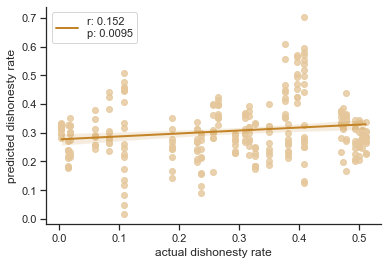

In [185]:
# plot results
coef_model = round(coef_model, 3)
p_model = round(p_model,4)
df = pd.DataFrame({'actual dishonesty rate':y_actual, 'predicted dishonesty rate':y_predict})
sns.set()
sns.set_style("white")
sns.set_style("ticks")
ax=sns.regplot(x="actual dishonesty rate", y="predicted dishonesty rate", data=df, scatter_kws = {'color': '#e5c79b', 'alpha': 0.8}, line_kws={'label':"r: {0}\np: {1}".format(coef_model, p_model), "color":"#C38427", "alpha":1, "lw":2}).legend(loc="best")
# palette=sns.color_palette("Paired")
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
# sns.palplot(palette)
plt.show()